In [1]:
import tensorflow as tf
import os

2023-08-02 19:29:18.409803: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-02 19:29:18.446815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 19:29:19.083501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-08-02 19:29:22.312018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-02 19:29:22.331481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-02 19:29:22.331622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
data = tf.keras.utils.image_dataset_from_directory(r'/home/aftaab/Documents/spectroscopy-project/sdbs-data',image_size = (256,512))

Found 324 files belonging to 2 classes.


In [38]:
len(data)

11

In [39]:
scaled_data = data.map(lambda x,y: (x/255, y))

splitting data

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

building model

In [42]:
train

<TakeDataset shapes: ((None, 256, 512, 3), (None,)), types: (tf.float32, tf.int32)>

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,512,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 510, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 255, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 126, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 124, 16)       4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 62, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29760)            

In [48]:
logdir = r'/home/aftaab/Documents/spectroscopy-project/logdir'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 673ms/step - loss: 1283.0375 - accuracy: 0.5268 - val_loss: 78.4783 - val_accuracy: 0.4219
Epoch 2/20
7/7 [==============================] - 2s 277ms/step - loss: 20.4730 - accuracy: 0.5089 - val_loss: 2.0203 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 2s 280ms/step - loss: 6.2737 - accuracy: 0.4955 - val_loss: 0.6824 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 2s 283ms/step - loss: 0.6868 - accuracy: 0.5893 - val_loss: 0.6510 - val_accuracy: 0.5938
Epoch 5/20
7/7 [==============================] - 2s 283ms/step - loss: 0.5665 - accuracy: 0.7143 - val_loss: 0.1303 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 2s 267ms/step - loss: 0.3157 - accuracy: 0.8795 - val_loss: 0.3475 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 2s 280ms/step - loss: 1.6794 - accuracy: 0.7768 - val_loss: 0.3209 - val_accuracy: 0.9375
Epoch 8/20
7/7 

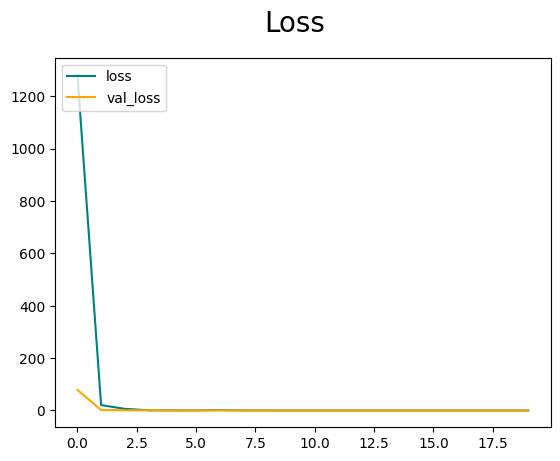

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

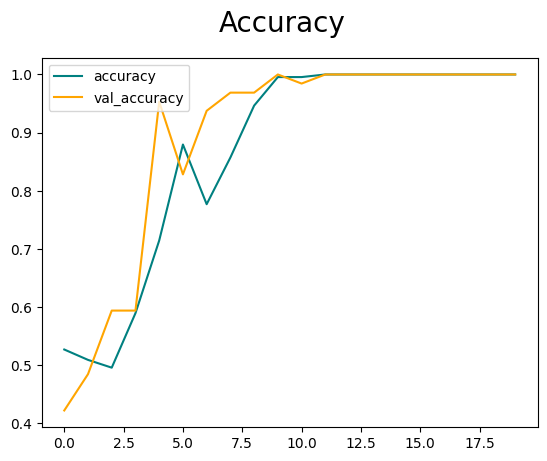

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

EVAL

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [56]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [7]:
import cv2

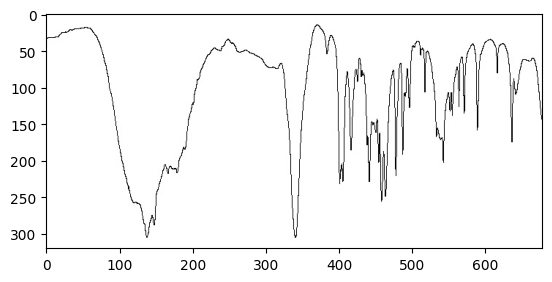

In [8]:
img = cv2.imread(r'/home/aftaab/Documents/spectroscopy-project/sdbs-data/carboxylic_acid/6227.jpg')
plt.imshow(img)
plt.show()


2023-08-02 19:31:34.904196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-02 19:31:34.904427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-02 19:31:34.904554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

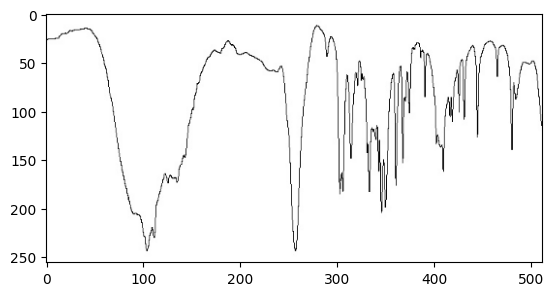

In [9]:
resize = tf.image.resize(img, (256,512))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))


In [73]:
yhat

array([[0.47524852]], dtype=float32)

In [74]:
# model.save(r'D:\programlanguages\python-\vspython\spectroscopy-project\models\spectroscopy.h5')

ignore previous 2 step and do this to load existing model

In [10]:
from tensorflow.keras.models import load_model

In [11]:
new_model = load_model(r'/home/aftaab/Documents/spectroscopy-project/models/spectroscopy.h5')

In [12]:
new_model.predict(np.expand_dims(resize/255, 0))

2023-08-02 19:31:55.853080: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-02 19:31:56.502702: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-02 19:31:56.503171: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-02 19:31:56.503200: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-02 19:31:56.503716: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-02 19:31:56.503762: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

1/1 [==============================] - 2s 2s/step


array([[0.5265319]], dtype=float32)